In [2]:
import os

os.chdir ("C:\\Users\\princess\\Desktop\\python")

In [3]:
# Import titanic_data as a pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency

titanic_df = pd.read_csv('titanic_data.csv')

# Looking at the data 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Question: What are factors that are significantly associated with survival on the titanic?

In [3]:
# Run some descriptive statistics

titanic_df.describe()
# Some people missing age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#double checking no duplicates

len(titanic_df['PassengerId'].unique())
#891 unique IDs

891

In [5]:
# getting frequencies
def count_of (column):
    number = titanic_df.groupby(column).PassengerId.count()
    return number

In [6]:
count_of ("Survived")

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [7]:
count_of ("SibSp")

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

In [8]:
# I want to get the column pcts
def count_Pct_of (column):
    number = titanic_df.groupby(column).PassengerId.count()
    colsum_stat = int(number.sum(axis=0))
    colsum_pct = 100.0 * (number/colsum_stat)
    
    Table_freq = pd.concat ([number, colsum_pct], axis = 1)
    Table_freq.columns = ['Num', 'Pct']
    return Table_freq

# Is there an easier way to do this ??

In [9]:
#Analyzing factors associated with survival
Outcome: Survival
    
count_Pct_of ("Survived")

,Num,Pct
Survived,,
0,549,61.616162
1,342,38.383838


In [10]:
count_Pct_of ("Sex")

#More males than females

,Num,Pct
Sex,,
female,314,35.241302
male,577,64.758698


In [11]:
count_Pct_of ("SibSp")
#Most did not have fam/siblings on board

,Num,Pct
SibSp,,
0,608,68.237935
1,209,23.456790
2,28,3.142536
3,16,1.795735
4,18,2.020202
5,5,0.561167
8,7,0.785634


In [46]:
count_Pct_of ("Pclass")
#a quarter are upper class 

,Num,Pct
Pclass,,
1,216,24.242424
2,184,20.650954
3,491,55.106622


In [12]:
# Recategorizing to no siblings and at least 1 sibling
def change_sib (siblings):
    if siblings == 0:
        return 0
    elif siblings >= 1:
        return 1

In [13]:
titanic_df['SibSp_cat'] = titanic_df['SibSp'].apply(change_sib) 

In [14]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [15]:
# how many missing age?
miss = titanic_df.loc [titanic_df.Age.isnull()]
miss.PassengerId.count()

177

In [16]:
#fill a negative # for those with missing ages
titanic_df['Age'] = titanic_df ['Age'].fillna(-99)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,-99.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [57]:
#looking at mean age - will have to take out missing values that I assigned as -99
No_missing_age = titanic_df ['Age'] > 0
titanic_df2 = titanic_df [No_missing_age]

titanic_df2.Age.mean()

29.69911764705882

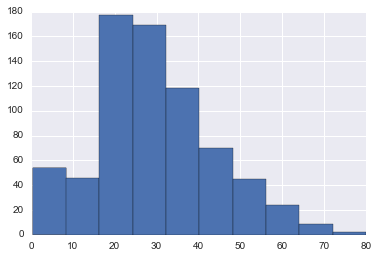

In [58]:
titanic_df2.Age.hist()

In [19]:
#Most were within the 20-40 years old range
#Creating categories of Age
def change_age (age):
    if age < 0:
        return None
    if age < 18:
        return '1'
    if age < 30:
        return '2'
    if age < 50:
        return '3'
    else:
        return '4'


In [20]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(change_age)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_cat,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3
5,6,0,3,"Moran, Mr. James",male,-99.0,0,0,330877,8.4583,NaN,Q,0,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [21]:
titanic_df.Age_cat.count()
#Did not counted the None values

714

In [102]:
print pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
#more females seemed to have survied than males

Survived    0    1
Sex               
female     81  233
male      468  109


In [22]:
print pd.crosstab(titanic_df['SibSp_cat'], titanic_df['Survived'])
#Those with a sibling/spouse had lower survival rate but also lower death rate 

Survived     0    1
SibSp_cat          
0          398  210
1          151  132


In [23]:
print pd.crosstab(titanic_df['Age_cat'], titanic_df['Survived'])
# Those who were 30-49 seems to account a large proportion of those who survived 

Survived    0    1
Age_cat           
1          52   61
2         176   95
3         149  107
4          47   27


In [47]:
print pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
#It seems as if those who were upper class had the highest survival rate and lowest death rate

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [24]:
#show plots in the notebook
%matplotlib inline

In [ ]:
# count plots to visualize survival by interested factors

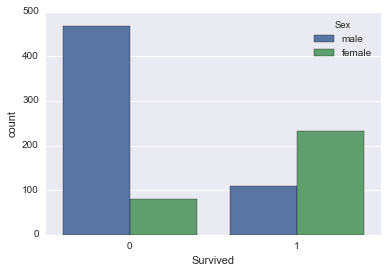

In [26]:
sns.countplot (x = 'Survived', hue = 'Sex', data = titanic_df)

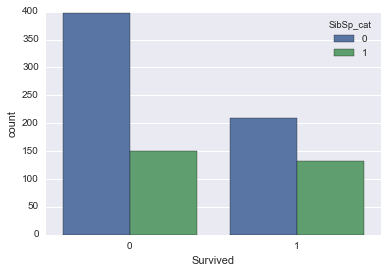

In [28]:
sns.countplot (x = 'Survived', hue = 'SibSp_cat', data = titanic_df)

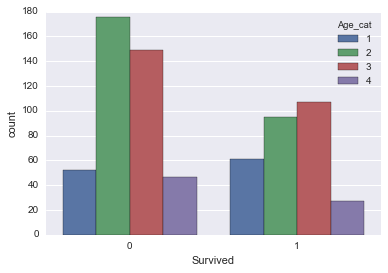

In [29]:
sns.countplot (x = 'Survived', hue = 'Age_cat', data = titanic_df)

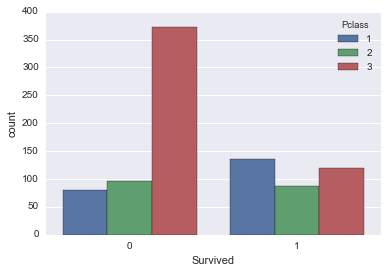

In [49]:
sns.countplot (x = 'Survived', hue = 'Pclass', data = titanic_df)

In [51]:
Sex_crosstab = pd.crosstab( titanic_df['Sex'], titanic_df['Survived'])
Sib_crosstab = pd.crosstab( titanic_df['SibSp_cat'], titanic_df['Survived'])
Age_crosstab = pd.crosstab( titanic_df['Age_cat'], titanic_df['Survived'])
Class_crosstab = pd.crosstab( titanic_df['Pclass'], titanic_df['Survived'])

In [35]:
#get column percentages for each of the above
def pct_cross(value):
    colsum = value.sum(axis = 0)
    colpct = value/colsum
    print (colpct)

In [36]:
pct_cross(Sex_crosstab)
#more females than males survived

Survived         0         1
Sex                         
female    0.147541  0.681287
male      0.852459  0.318713


In [37]:
pct_cross(Sib_crosstab)
#those with no siblings had higher survival rate but also higher death rate

Survived          0         1
SibSp_cat                    
0          0.724954  0.614035
1          0.275046  0.385965


In [38]:
pct_cross(Age_crosstab)
#18-49 year olds have higher survival rates but also higher death rates

Survived         0         1
Age_cat                     
1         0.122642  0.210345
2         0.415094  0.327586
3         0.351415  0.368966
4         0.110849  0.093103


In [52]:
pct_cross(Class_crosstab)

Survived         0         1
Pclass                      
1         0.145719  0.397661
2         0.176685  0.254386
3         0.677596  0.347953


In [41]:
#Chi sq function
def chi_sq (value):
    chi = chi2_contingency(value)
    print (chi)

In [42]:
chi_sq (Sex_crosstab)

(260.71702016732104, 1.1973570627755645e-58, 1, array([[ 193.47474747,  120.52525253],
       [ 355.52525253,  221.47474747]]))


In [43]:
chi_sq (Sib_crosstab)

(11.45562814125045, 0.00071277791477961474, 1, array([[ 374.62626263,  233.37373737],
       [ 174.37373737,  108.62626263]]))


In [45]:
chi_sq (Age_crosstab)

(12.515538737494198, 0.0058105037167187762, 3, array([[  67.10364146,   45.89635854],
       [ 160.92997199,  110.07002801],
       [ 152.02240896,  103.97759104],
       [  43.94397759,   30.05602241]]))


In [53]:
chi_sq (Class_crosstab)

(102.88898875696056, 4.5492517112987927e-23, 2, array([[ 133.09090909,   82.90909091],
       [ 113.37373737,   70.62626263],
       [ 302.53535354,  188.46464646]]))


In [ ]:
'''There were significant differences in survival rates:
1) between males and females, 
2) whether or not a passenger had a sibling or spouse
3) among age groups
4) among SES as measured by class

From the bar charts and column percentages, it seems that females, those with no siblings/spouses, between 30-49 years old, and 
upper middle class have higher survival rates. 

Limitations: Bsides the chi-square, I did not perform any other statistical tests. While chi-sq tests suggest that there are 
significant differences among groups -they do not indicate which groups. 

Some are also missing age values

I used a number of websites to look up how properly define functions and perform chi-sq tests, including 
stackoverflow, courseera, pydata.org

''' 